In [1]:
import numpy as py
import pandas as pd
import seaborn as sns
from scipy import stats

data = pd.read_csv("Financial Distress.csv")

Null Values any:  False
Outliers are present


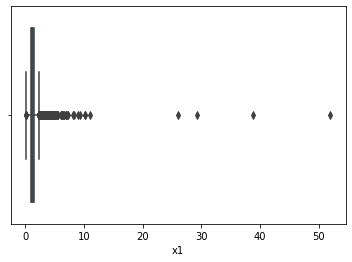

In [5]:
#Feature Selection
X = data.drop(['Company','Time','Financial Distress'],1)

#Target Value
Y = data[['Financial Distress']]

#Data is returning only 5 values
data.head(5)

#No null values in the data
print("Null Values any: ", data.isnull().values.any())

#box plot
sns.boxplot(x=data['x1'])
print("Outliers are present")

# #zscore
# print(stats.zscore(data) < 3)

In [9]:
#Data is not skewed. It is both positive and negatively skewed.
skewvalues = data.skew()
print("Data with Skew value = 0 ", (skewvalues == 0).any())

Data with Skew value = 0  False


In [80]:
# Method to normalize skew data using log tranformation
def normalizeData(data, featureName):
    print(featureName)
    skewed = py.log(data[featureName])
    skewed

for i in X:
    print(i)
    print("before", data[i].skew())
    #Plus one to avoid nan after skewing
    data[i] = py.log(data[i]+1)
    print("after", data[i].skew())



x1
before 20.058156982382698
after 2.264784853357171
x2
before 1.0262405041149962
after 0.6226925090964242
x3
before -0.5140967457540233
after -0.7915389734114331
x4
before 3.2145455720126805
after 0.8816296516944192
x5
before 0.8714330722503909
after 0.4736565428969752
x6
before 0.16944506926534944
after -0.5746269116963356
x7
before 21.014228299592414
after 2.308425155964193
x8
before 21.162111011451884
after 16.647268614639717
x9
before 0.7121572648188537
after -2.477303163091831
x10
before 0.9649171731986402
after 0.5672924691330856
x11
before -0.6158983139981181
after -0.8949277673878183
x12
before 16.12871945962278
after 2.893806642585929
x13
before 0.5140948795902042
after 0.24095087800678885
x14
before 3.3606658419340816
after 0.702638974616091
x15
before 24.76015453643922
after 4.019356408565222
x16
before -5.748006881746334
after 17.316420668894747
x17
before 55.493665022391916
after 5.5813216998479325
x18
before 3.3645144777830205
after 2.845079624067904
x19
before 42.782784

/Users/riddhij/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/riddhij/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
# #histogram for unskew data
# def plotHistogram(data):
#     for i in data:
#         data[i].hist()

        
# plotHistogram(X)

In [6]:
z = py.abs(stats.zscore(data))
print(z)
threshold = 3
print(py.where(z > 2))
# filtered_entries = (z < threshold)
# new_df = data[filtered_entries]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# Q1 = data_o1.quantile(0.25)
# Q3 = data_o1.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

[[1.54761503 1.60659116 0.38826272 ... 0.91375652 1.40102389 1.00292455]
 [1.54761503 1.3604956  0.56421656 ... 1.0019637  1.44445356 1.0438033 ]
 [1.54761503 1.11440004 0.51497576 ... 2.13872822 1.48654673 1.08388824]
 ...
 [2.05040802 1.10045999 0.20343663 ... 0.2988138  0.63454636 0.73903692]
 [2.05040802 1.34655554 0.16185836 ... 0.27622066 0.45188611 0.78542785]
 [2.05040802 1.5926511  0.19669421 ... 0.14609407 0.29076835 0.83079911]]
(array([   0,    0,    2, ..., 3671, 3671, 3671]), array([39, 43, 16, ..., 36, 52, 56]))
Company               184.250000
Time                    7.000000
Financial Distress      1.179475
x1                      0.249949
x2                      0.125296
                         ...    
x79                     1.550597
x80                     0.587787
x81                     0.682682
x82                     0.944462
x83                     0.715620
Length: 86, dtype: float64


/Users/riddhij/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/riddhij/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in subtract
  return (a - mns) / sstd
/Users/riddhij/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [86]:
data.head(5)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,0.824614,0.022675,0.628363,0.795884,0.059155,0.172498,0.422060,...,4.459416,3.334701,3.299608,2.833213,2.833213,0.182322,3.135494,0.058637,3.433987,3.912023
1,1,2,-0.455970,0.819780,0.006433,0.599205,0.695594,-0.014180,0.166395,0.484202,...,4.682964,3.475377,3.440226,2.890372,2.833213,0.336472,3.135494,0.010580,3.465736,3.931826
2,1,3,-0.325390,0.719253,-0.061215,0.653585,0.547694,0.020269,0.043888,0.359714,...,4.802955,3.612808,3.591074,2.890372,2.772589,-0.223144,3.135494,-0.608751,3.496508,3.951244
3,1,4,-0.566570,0.748156,-0.015346,0.619974,0.593183,0.073285,0.087125,0.516088,...,4.021881,3.708682,3.673182,2.899607,2.833213,1.887070,3.135494,-0.393621,3.526361,3.970292
4,2,1,1.357300,0.723822,0.101672,0.595865,0.607551,0.182288,0.046693,0.555034,...,4.459416,3.334701,3.299608,2.833213,2.833213,0.182322,3.401197,0.811375,2.079442,3.332205


In [3]:
#Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
#Spliting Training and Test data
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [7]:
#Replacing the continous value with binary value for output
arr = []
for i in Y['Financial Distress']:
    assigned_class = 1
    if i > -0.5:
        assigned_class = 0
    arr.append(assigned_class)
y_class = py.array(arr)

In [8]:
#Split Training and test data sample
X_train, X_test, y_train, y_test = train_test_split(X,y_class,test_size=0.25,random_state=1)

In [11]:
#Logistic Regression 
model = LogisticRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print("Without any pre processing, the accuracy score is -", accuracy*100)
cm = confusion_matrix(y_test, y_pred) 

Without any pre processing, the accuracy score is - 94.98910675381264


/Users/riddhij/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
